#PROBLEM 4 EM for coin flips
Three coins A,B,C with head-prob p_A, p_B, p_C can be chosen for each of N sessions. Once a coin is chosen for the session, that coin is flipped D times.
For D=20 and N=50, and fixed non-uniform selection coin probabilities pi_A, pi_B, pi_C, which sum to 1, we have this outcome , each row corresponds to a session with 20 binary 1=head 0=tail.

Compute the probabilities to select each coin to session (3 mixture "pi" probabilities), and also the bias probabilities (3 param "p" probabilities).

In [15]:
import numpy as np
from scipy.stats import binom
import requests
import matplotlib.pyplot as plt

In [16]:
# Initialize X
url = 'https://www.khoury.northeastern.edu/home/vip/teach/DMcourse/2_cluster_EM_mixt/HW2/coin_flips_outcome.txt'

response = requests.get(url)
data = response.text

data_lines = data.strip().split('\n')
X = np.array([list(map(float, line.split())) for line in data_lines])

In [17]:
X.shape

(50, 20)

In [18]:
Y = np.sum(X, axis=1)
Y.shape

(50,)

In [19]:
for i in range(1,21):
  print(f"Freq of {i} = {len(Y[Y==i])}")

Freq of 1 = 0
Freq of 2 = 1
Freq of 3 = 5
Freq of 4 = 1
Freq of 5 = 4
Freq of 6 = 1
Freq of 7 = 2
Freq of 8 = 3
Freq of 9 = 1
Freq of 10 = 2
Freq of 11 = 4
Freq of 12 = 5
Freq of 13 = 3
Freq of 14 = 7
Freq of 15 = 2
Freq of 16 = 0
Freq of 17 = 0
Freq of 18 = 3
Freq of 19 = 6
Freq of 20 = 0


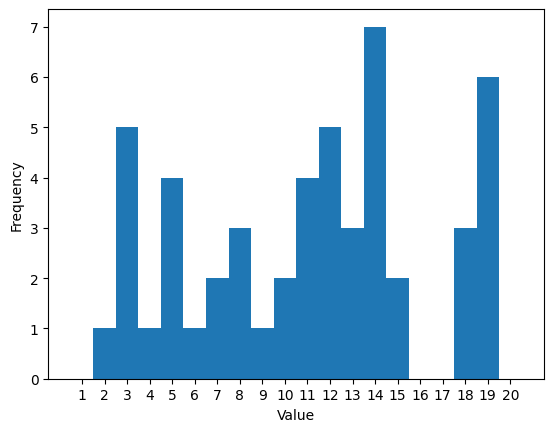

In [20]:
plt.hist(Y,bins=np.arange(1, 22)-0.5)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xticks(np.arange(1, 21))
plt.show()

In [21]:
# Weird prob with high freq: 0.95 (19/20) and 0.15 (3/20)
# Corresponding prob of selection: 0.12 (6/50) and 0.1 (5/50)

# personal opinion
# There must be a coin with high bias >0.9 and low selection prob ~ 0.2 [responsible for freq of 18 and 19]

# There must be a coin with slightly high bias [50-70]% with high selection prob (~0.5)

# There must be a coin with low bias [15-25]% with low selection prob

In [22]:
def E_step(Y, gamma, selection_prob,bias):
  for n in range(50):
    n1 = selection_prob[0]*binom.pmf(Y[n], 20, bias[0])
    n2 = selection_prob[1]*binom.pmf(Y[n], 20, bias[1])
    n3 = selection_prob[2]*binom.pmf(Y[n], 20, bias[2])

    gamma[n,0] = n1/(n1+n2+n3)
    gamma[n,1] = n2/(n1+n2+n3)
    gamma[n,2] = n3/(n1+n2+n3)

  return gamma

In [23]:
def M_step(Y, gamma, selection_prob,bias):
  selection_prob[0] = gamma.T[0].sum() / 50
  selection_prob[1] = gamma.T[1].sum() / 50
  selection_prob[2] = gamma.T[2].sum() / 50

  bias[0] = (gamma.T[0] * Y).sum() / (gamma.T[0] * 20).sum()
  bias[1] = (gamma.T[1] * Y).sum() / (gamma.T[1] * 20).sum()
  bias[2] = (gamma.T[2] * Y).sum() / (gamma.T[2] * 20).sum()

  return selection_prob,bias


In [24]:
# Initialization - 1

p_A = 0.5
p_B = 0.5
p_C = 0.5

bias = [p_A,p_B,p_C]

pi_A = 0.33
pi_B = 0.33
pi_C = 0.34

selection_prob = [pi_A,pi_B,pi_C]

gamma = np.empty((50, 3))

In [25]:
for i in range(500):
  E_step(Y, gamma, selection_prob,bias)
  M_step(Y, gamma, selection_prob,bias)

In [26]:
selection_prob

[0.18610789351627122, 0.18610789351627122, 0.6277842129674576]

In [27]:
bias

[0.2713825627450426, 0.2713825627450426, 0.7199721122078858]

In [30]:
# Initialization - 2 (based on my intuition of data)
# 3 coins are there such that
# Low bias, Low selection
# Slightly high bias, High selection
# High bias, Low selection

p_A = 0.8
p_B = 0.5
p_C = 0.2

bias = [p_A,p_B,p_C]

pi_A = 0.2
pi_B = 0.6
pi_C = 0.2

selection_prob = [pi_A,pi_B,pi_C]

gamma = np.empty((50, 3))


for i in range(500):
  E_step(Y, gamma, selection_prob,bias)
  M_step(Y, gamma, selection_prob,bias)

print(selection_prob)
print(bias)

[0.17855767772922992, 0.5146283397819821, 0.30681398248878794]
[0.931728533231595, 0.6100378318845452, 0.2369186684893597]


In [33]:
sum(selection_prob)

1.0

In [31]:
# Algo is DETERMINISTIC

# p_A = 0.8
# p_B = 0.5
# p_C = 0.2

# bias = [p_A,p_B,p_C]

# pi_A = 0.2
# pi_B = 0.6
# pi_C = 0.2

# selection_prob = [pi_A,pi_B,pi_C]

# gamma = np.empty((50, 3))


# for i in range(500):
#   E_step(Y, gamma, selection_prob,bias)
#   M_step(Y, gamma, selection_prob,bias)

# print(selection_prob)
# print(bias)

[0.17855767772922992, 0.5146283397819821, 0.30681398248878794]
[0.931728533231595, 0.6100378318845452, 0.2369186684893597]


In [34]:
# Different Initialization - 3 (Not as extreme as my intuition)

p_A = 0.4
p_B = 0.5
p_C = 0.6

bias = [p_A,p_B,p_C]

pi_A = 0.3
pi_B = 0.5
pi_C = 0.2

selection_prob = [pi_A,pi_B,pi_C]

gamma = np.empty((50, 3))


for i in range(500):
  E_step(Y, gamma, selection_prob,bias)
  M_step(Y, gamma, selection_prob,bias)

print(selection_prob)
print(bias)

[0.3068139824887881, 0.5146283397819821, 0.17855767772922992]
[0.23691866848935975, 0.6100378318845451, 0.9317285332315948]


# My Answer

Based on my intuition of data the selection probabilities of coins with their bias:

pi_A = 0.18, p_A = 0.93 <br>
pi_B = 0.51, p_B = 0.61 <br>
pi_C =  0.31, p_C = 0.23 <br>